In [1]:
# utilizado para la manipulación de directorios y rutas
import os
import pandas as pd
# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [2]:
def csvAdapted(dataset, modifyColumns, dropColumns):
    data = pd.read_csv(dataset, encoding='latin-1')
    columns = data.columns

    for index in modifyColumns:
        name = columns[index]
        value = list( data[name].unique() )
        data[name] = data[name].map( dict( zip( value,  [i for i in range( len(value) ) ] ) ) )

    data = data.drop([columns[index] for index in dropColumns ], axis=1)
    data = data.dropna()
#data= data.drop('nombre', axis=1) 1 elimina una columna, 0 elimina una fila
    print(data.head())

    return data.to_numpy()
data = csvAdapted("/content/digital_letters.csv", [785],[0]) #cambia la columna 785 y les asigna valores, elimina la columna 0

     0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  label  
0  0.0  0.0  0.0  0.0  0.0      0  
1  0.0  0.0  0.0  0.0  0.0      1  
2  0.0  0.0  0.0  0.0  0.0      2  
3  0.0  0.0  0.0  0.0  0.0      3  
4  0.0  0.0  0.0  0.0  0.0      4  

[5 rows x 785 columns]


In [3]:
X = data[:, :784]
y = data[:, 784]
m = y.size

In [4]:
# data.shape
X.shape[1]

784

In [5]:
input_layer_size  = 784
num_labels = 26
m = y.size

In [6]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

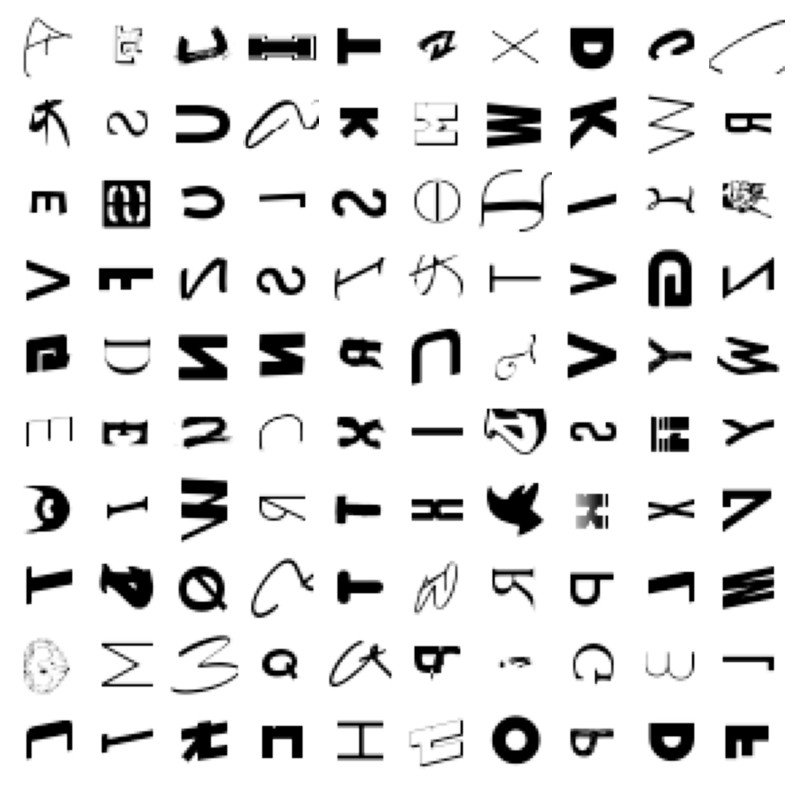

In [7]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [8]:
def calcularSigmoide(z):
    # Calcula la sigmoide de z.

    return 1.0 / (1.0 + np.exp(-z))

In [9]:
def calcularCosto(theta, X, y, lambda_):
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = calcularSigmoide(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    # Se aplica regularizacion en la siguiente linea
    grad = grad + (lambda_ / m) * temp

    return J, grad

In [10]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate((np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0), axis=1)
print(X_t)
# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]


In [11]:
J, grad = calcularCosto(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo         : 2.534819
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [12]:
def oneVsAll(X, y, num_labels, lambda_):

    m, n = X.shape

    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)


    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(calcularCosto,
                                initial_theta,
                                (X, (y == (c + 1)), lambda_),
                                jac=True,
                                method='BFGS',
                                options=options)

        all_theta[c] = res.x

    return all_theta

In [13]:
lambda_ = 0.001
all_theta = oneVsAll(X, y, num_labels, lambda_)

<ipython-input-8-b4b3dba6631b>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-9-d22e4f31dd79>:17: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-9-d22e4f31dd79>:17: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-8-b4b3dba6631b>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-9-d22e4f31dd79>:17: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-9-d22e4f31dd79>:17: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambd

In [14]:
print(all_theta)

[[-3.82577843e-02 -3.79876052e-03 -4.98181016e-04 ...  6.47947861e-03
   1.92484891e-03 -1.10831863e-03]
 [-2.94921633e-02 -2.92817533e-03 -2.88460390e-05 ... -1.32543164e-03
  -9.32854529e-04 -2.61461218e-03]
 [-2.63281572e-02 -1.83351878e-03 -9.74308609e-04 ... -4.19097012e-03
  -4.40099537e-04 -2.56800801e-03]
 ...
 [-2.10060573e-03 -1.36187353e-03 -9.96443508e-04 ...  7.51837539e-04
   9.16620987e-04 -7.52316587e-04]
 [-2.92610239e-02  1.83804496e-03 -1.02215064e-03 ... -3.34530002e-03
  -6.58543599e-04 -4.72207019e-03]
 [-6.43356534e-04 -3.26636962e-05 -1.25559612e-05 ... -1.31928578e-04
  -1.17007001e-04 -1.26014538e-04]]


In [15]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(calcularSigmoide(X.dot(all_theta.T)), axis = 1)

    return p + 1

(7071, 784)
Precision del conjuto de entrenamiento: 78.98%
(1, 784)
1
[6]
(7071, 784)


<ipython-input-8-b4b3dba6631b>:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


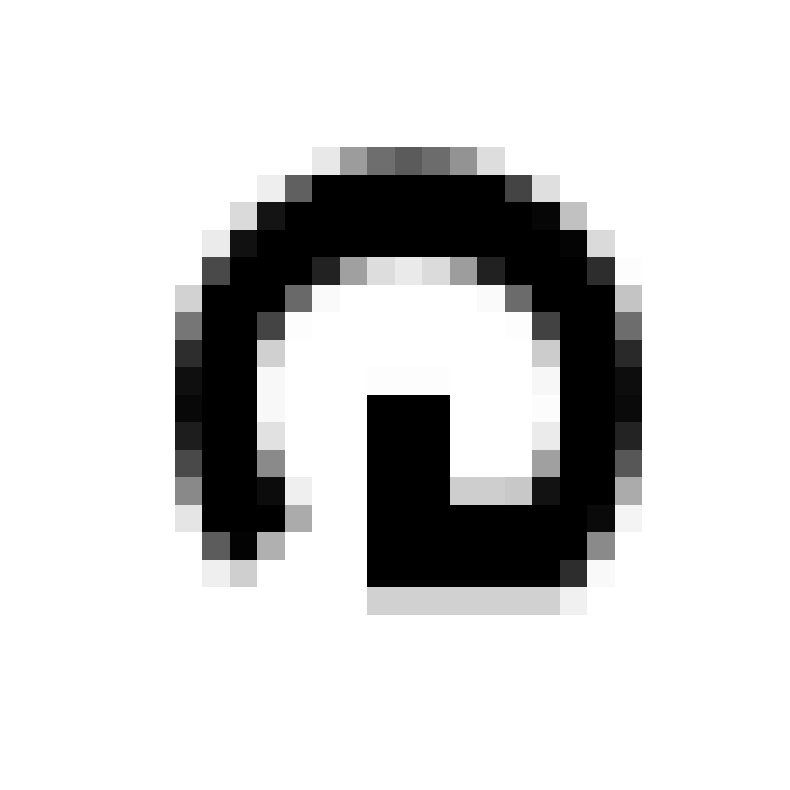

In [20]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
XPrueba = X[4400:4401]
XPruebaV = XPrueba.copy()
print(XPrueba.shape)
print(len(XPrueba))

#print(np.ones((1)))
#p = np.zeros(1)
XPrueba = np.concatenate((np.ones((1, 1)), XPruebaV), axis=1)
# print(XPrueba)
# print(XPrueba.shape)
# print(XPrueba)
p = np.argmax(calcularSigmoide(XPrueba.dot(all_theta.T)), axis = 1)
print(p + 1)

displayData(XPruebaV)

print(X.shape)
# pred = predictOneVsAll(all_theta, X)
# print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
# # XPrueba = X[4490:4590, :].copy()

# # Selecciona aleatoriamente 100 puntos de datos para mostrar
# rand_indices = np.random.choice(m, 100, replace=False)
# XPrueba = X[rand_indices, :]
# XPruebaV = XPrueba.copy()


# print(XPrueba.shape)

# XPrueba = np.concatenate([np.ones((100, 1)), XPrueba], axis=1)
# print(XPrueba.shape)
# p = np.argmax(calcularSigmoide(XPrueba.dot(all_theta.T)), axis = 1)
# print(p, y[rand_indices])

# displayData(XPruebaV)